In [1]:
import sys
print(sys.executable)

/n/holylfs06/LABS/kempner_fellow_wcarvalho/ishaan/crossEnvCooperation/.venv/bin/python


In [2]:
#%pip install --upgrade -qq "jax[cuda11_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html #originally was cuda11_pip
#%pip install -U "jax[cuda11_pip]==0.4.18" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
#%pip install -qq matplotlib jaxmarl pettingzoo
#exit(0) #essentially, restarts the runtime after the installation


import numpy as np
import jax

print("NumPy version:", np.__version__)
print("JAX version:", jax.__version__)
print("JAX devices:", jax.devices())
print("JAX default backend:", jax.default_backend())
print("CUDA available:", len(jax.devices('gpu')) > 0)

if len(jax.devices('gpu')) > 0:
    print("✓ SUCCESS: GPU backend is working!")
    # Test a simple GPU operation
    x = jax.numpy.array([1.0, 2.0, 3.0])
    print(f"Test array on device: {x.device()}")
else:
    print("⚠ Still using CPU backend - cuDNN may not be detected")



NumPy version: 1.26.4
JAX version: 0.4.18


CUDA backend failed to initialize: Found cuDNN version 0, but JAX was built against version 8600, which is newer. The copy of cuDNN that is installed must be at least as new as the version against which JAX was built. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


JAX devices: [CpuDevice(id=0)]
JAX default backend: cpu


RuntimeError: Unknown backend: 'gpu' requested, but no platforms that are instances of gpu are present. Platforms present are: cpu

In [3]:
import numpy as np
import jax

print("NumPy version:", np.__version__)
print("JAX version:", jax.__version__)
print("JAX devices:", jax.devices())
print("JAX default backend:", jax.default_backend())
print("CUDA available:", len(jax.devices('gpu')) > 0)

if len(jax.devices('gpu')) > 0:
    print("✓ SUCCESS: GPU backend is working!")
    # Test a simple GPU operation
    x = jax.numpy.array([1.0, 2.0, 3.0])
    print(f"Test array on device: {x.device()}")
else:
    print("⚠ Still using CPU backend - cuDNN may not be detected")


NumPy version: 1.26.4
JAX version: 0.4.18
JAX devices: [CpuDevice(id=0)]
JAX default backend: cpu


RuntimeError: Unknown backend: 'gpu' requested, but no platforms that are instances of gpu are present. Platforms present are: cpu

# JaxMARL Example Usage

Welcome to a walkthrough of the JaxMARL repo. We include several popular MARL environemnts and algorithms, allowing you to easily evaluate your new approach! This colab will showcase our API, the speed of our environments and how to train over multiple seeds.

⚠️ Ensure you select a GPU from `Runtime > Change runtime type` ⚠️

### Install dependencies 📚

We install JAX for use with a GPU, there is rather a lot to download so this may take a second or two.

Note, that the runtime will reboot automatically immediately after.


## Part 1: JaxMARL API 🕹️

Our API is inspired by [PettingZoo](https://github.com/Farama-Foundation/PettingZoo) and [Gymnax](https://github.com/RobertTLange/gymnax), making it familiar to MARL researchers. Below, an MPE scenario is instatiated from JaxMARL's registry and a trajectory is sampled using random actions. We then visualise the results. Examples for more JaxMARL environments can be found [here](https://github.com/FLAIROx/JaxMARL/tree/main/jaxmarl/tutorials).

* `actions`, `obs`, `rewards`, `dones` are dictionaries keyed by agent name, this allows for differing action and observation spaces. As agents can terminate asychronously, `dones` contains a special `"__all__"` which signifies whether an episode has terminated.
* `state` represents the internal state of the environment and contains all the information needed to transistion the environment given a set of actions. These variables are not held within the environment class due to JAX transformations requiring pure functions.
* `info` is a dictionary containing pertinent information, the exact content varies environment to environment.


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


list of agents in environment ['agent_0', 'agent_1']


/n/holylfs06/LABS/kempner_fellow_wcarvalho/ishaan/crossEnvCooperation/.venv/lib/python3.10/site-packages/gymnax/environments/spaces.py:38: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  ).astype(self.dtype)


example action dict {'agent_0': Array(40, dtype=int32), 'agent_1': Array(37, dtype=int32)}


/n/holylfs06/LABS/kempner_fellow_wcarvalho/ishaan/crossEnvCooperation/.venv/lib/python3.10/site-packages/gymnax/environments/spaces.py:38: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  ).astype(self.dtype)


Comm active?  True
comm idx [0 1]


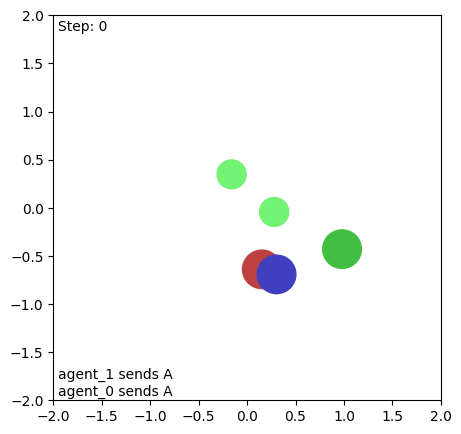

In [ ]:
%matplotlib inline

import matplotlib.animation as animation
import jax
from jaxmarl import make
from jaxmarl.environments.mpe import MPEVisualizer
from IPython.display import HTML


# Parameters + random keys
max_steps = 25
key = jax.random.PRNGKey(0)
key, key_r, key_a = jax.random.split(key, 3)

# Instantiate environment
env = make('MPE_simple_reference_v3')
obs, state = env.reset(key_r)
print('list of agents in environment', env.agents)

# Sample random actions
key_a = jax.random.split(key_a, env.num_agents)
actions = {agent: env.action_space(agent).sample(key_a[i]) for i, agent in enumerate(env.agents)}
print('example action dict', actions)

# Collect trajectory
state_seq = []
for _ in range(max_steps):
    state_seq.append(state)
    # Iterate random keys and sample actions
    key, key_s, key_a = jax.random.split(key, 3)
    key_a = jax.random.split(key_a, env.num_agents)
    actions = {agent: env.action_space(agent).sample(key_a[i]) for i, agent in enumerate(env.agents)}

    # Step environment
    obs, state, rewards, dones, infos = env.step(key_s, state, actions)

# Visualise
viz = MPEVisualizer(env, state_seq)
ani = animation.FuncAnimation(
    viz.fig,
    viz.update,
    frames=len(viz.state_seq),
    blit=False,
    interval=viz.interval,
)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [5]:
!pip show numpy | grep Version

Version: 2.2.2
         Version 3.1, 31 March 2009
                                Version 3, 29 June 2007
           5. Conveying Modified Source Versions.
           14. Revised Versions of this License.


## Part 2: Compare speed 🚀

We can then compare the speed of JaxMARL's MPE environments to the CPU-based ones provided by PettingZoo. We again take random actions and compare the number of environment steps per second between the two implementations.

We also show how JaxMARL environments can be simply vectorised, using `jax.vmap`, to greatly increase the number of environment steps per second.

In [6]:
MPE_ENV = "MPE_simple_reference_v3"

In [7]:
import numpy as np
import jaxmarl
import jax

def make_benchmark(config):
    env = jaxmarl.make(config["ENV_NAME"], **config["ENV_KWARGS"])
    config["NUM_ACTORS"] = env.num_agents * config["NUM_ENVS"]

    def benchmark(rng):
        def init_runner_state(rng):

            # INIT ENV
            rng, _rng = jax.random.split(rng)
            reset_rng = jax.random.split(_rng, config["NUM_ENVS"])
            obsv, env_state = jax.vmap(env.reset)(reset_rng)

            return (env_state, obsv, rng)

        def env_step(runner_state, unused):
            env_state, last_obs, rng = runner_state

            # SELECT ACTION
            rng, _rng = jax.random.split(rng)
            rngs = jax.random.split(_rng, config["NUM_ACTORS"]).reshape((env.num_agents, config["NUM_ENVS"], -1))
            actions = {k: jax.vmap(env.action_space(k).sample)(rngs[i]) for i, k in enumerate(env.agents)}

            # STEP ENV
            rng, _rng = jax.random.split(rng)
            rng_step = jax.random.split(_rng, config["NUM_ENVS"])
            obsv, env_state, _, _, info = jax.vmap(env.step)(
                rng_step, env_state, actions
            )
            runner_state = (env_state, obsv, rng)
            return runner_state, None

        rng, init_rng = jax.random.split(rng)
        runner_state = init_runner_state(init_rng)
        runner_state = jax.lax.scan(env_step, runner_state, None, config["NUM_STEPS"])
        return runner_state

    return benchmark

In [8]:
import time
import jax
import jax.numpy as jnp
from jaxmarl.environments.mpe.simple_world_comm import SimpleWorldCommMPE
from pettingzoo.mpe import simple_v3, simple_tag_v3, simple_world_comm_v3, simple_reference_v3, simple_spread_v3, simple_crypto_v3, simple_speaker_listener_v4, simple_push_v3, simple_adversary_v3
import time

config = {
    "NUM_STEPS": 1000,
    "NUM_ENVS": 1000,
    "ACTIVATION": "relu",
    "ENV_KWARGS": {},
    "ENV_NAME": MPE_ENV,
    "NUM_SEEDS": 1,
    "SEED": 0,
}

### JAXMARL BENCHMARK
num_envs = [1, 100, 1000, 10000]
jaxmarl_sps = []
for num in num_envs:
  config["NUM_ENVS"] = num
  benchmark_fn = jax.jit(make_benchmark(config))
  rng = jax.random.PRNGKey(config["SEED"])
  rng, _rng = jax.random.split(rng)
  benchmark_jit = jax.jit(benchmark_fn).lower(_rng).compile()
  before = time.perf_counter_ns()
  runner_state = jax.block_until_ready(benchmark_jit(_rng))
  after = time.perf_counter_ns()
  total_time = (after - before) / 1e9

  sps = config['NUM_STEPS'] * config['NUM_ENVS'] / total_time
  jaxmarl_sps.append(sps)

  print(f"JaxMARL, Num Envs: {num}, Total Time (s): {total_time}")
  print(f"JaxMARL, Num Envs: {num}, Total Steps: {config['NUM_STEPS'] * config['NUM_ENVS']}")
  print(f"JaxMARL, Num Envs: {num}, SPS: {sps}")


### PETTING ZOO BENCHMARK
zoo_mpe_env_mapper = {
    "MPE_simple_v3": simple_v3,
    "MPE_simple_world_comm_v3": simple_world_comm_v3,
    "MPE_simple_tag_v3": simple_tag_v3,
    "MPE_simple_spread_v3": simple_spread_v3,
    "MPE_simple_crypto_v3": simple_crypto_v3,
    "MPE_simple_speaker_listener_v4": simple_speaker_listener_v4,
    "MPE_simple_push_v3": simple_push_v3,
    "MPE_simple_adversary_v3": simple_adversary_v3,
    "MPE_simple_reference_v3": simple_reference_v3,
}
zoo_env = zoo_mpe_env_mapper[config["ENV_NAME"]]
env = zoo_env.parallel_env(max_cycles=max_steps)
obs = env.reset()

start_time = time.time()
actions = {agent: env.action_space(agent).sample() for agent in env.agents}

for _ in range(config["NUM_STEPS"]):
    actions = {agent: env.action_space(agent).sample() for agent in env.agents}  # this is where you would insert your policy
    observations, rewards, terminations, truncations, infos = env.step(actions)

zoo_time = time.time() - start_time
zoo_sps = config["NUM_STEPS"]/zoo_time


print(f"PettingZoo Total Time (s): {zoo_time}")
print(f"PettingZoo Total Steps: {config['NUM_STEPS']}")
print(f"PettingZoo SPS: {zoo_sps}")


/n/holylfs06/LABS/kempner_fellow_wcarvalho/ishaan/crossEnvCooperation/.venv/lib/python3.10/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists
/n/holylfs06/LABS/kempner_fellow_wcarvalho/ishaan/crossEnvCooperation/.venv/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:733: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


JaxMARL, Num Envs: 1, Total Time (s): 0.221846588
JaxMARL, Num Envs: 1, Total Steps: 1000
JaxMARL, Num Envs: 1, SPS: 4507.6194726059975
JaxMARL, Num Envs: 100, Total Time (s): 0.192567836
JaxMARL, Num Envs: 100, Total Steps: 100000
JaxMARL, Num Envs: 100, SPS: 519297.52173151076
JaxMARL, Num Envs: 1000, Total Time (s): 0.198616839
JaxMARL, Num Envs: 1000, Total Steps: 1000000
JaxMARL, Num Envs: 1000, SPS: 5034819.832169416
JaxMARL, Num Envs: 10000, Total Time (s): 0.252434498
JaxMARL, Num Envs: 10000, Total Steps: 10000000
JaxMARL, Num Envs: 10000, SPS: 39614236.87819404
PettingZoo Total Time (s): 0.01610708236694336
PettingZoo Total Steps: 1000
PettingZoo SPS: 62084.49036383552


error: XDG_RUNTIME_DIR is invalid or not set in the environment.


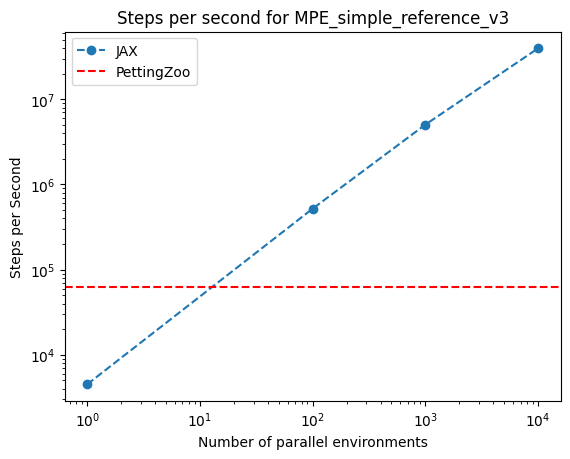

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(num_envs, jaxmarl_sps, linestyle='--', marker='o', label="JAX")
plt.axhline(y=zoo_sps, color='r', linestyle='--', label="PettingZoo")
plt.legend()

plt.ylabel("Steps per Second")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of parallel environments")
plt.title(f"Steps per second for {MPE_ENV}")
plt.show()

## Part 3: Train an agent 🍲

We train an agent on the `cramped_room` Overcooked scenario using IPPO, our IPPO code is based off [PureJaxRL](https://github.com/luchris429/purejaxrl). Here we also show how `jax.vmap` can again be used to simply train over multiple seeds.

In [12]:
import jax
import jax.numpy as jnp
import flax.linen as nn
import numpy as np
import optax
from flax.linen.initializers import constant, orthogonal
from typing import Sequence, NamedTuple, Any
from flax.training.train_state import TrainState
import distrax
from gymnax.wrappers.purerl import LogWrapper, FlattenObservationWrapper
import jaxmarl
from jaxmarl.wrappers.baselines import LogWrapper
from jaxmarl.environments.overcooked import overcooked_layouts
from jaxmarl.viz.overcooked_visualizer import OvercookedVisualizer
import hydra
from omegaconf import OmegaConf

import matplotlib.pyplot as plt

class ActorCritic(nn.Module):
    action_dim: Sequence[int]
    activation: str = "tanh"

    @nn.compact
    def __call__(self, x):
        if self.activation == "relu":
            activation = nn.relu
        else:
            activation = nn.tanh
        actor_mean = nn.Dense(
            64, kernel_init=orthogonal(np.sqrt(2)), bias_init=constant(0.0)
        )(x)
        actor_mean = activation(actor_mean)
        actor_mean = nn.Dense(
            64, kernel_init=orthogonal(np.sqrt(2)), bias_init=constant(0.0)
        )(actor_mean)
        actor_mean = activation(actor_mean)
        actor_mean = nn.Dense(
            self.action_dim, kernel_init=orthogonal(0.01), bias_init=constant(0.0)
        )(actor_mean)
        pi = distrax.Categorical(logits=actor_mean)

        critic = nn.Dense(
            64, kernel_init=orthogonal(np.sqrt(2)), bias_init=constant(0.0)
        )(x)
        critic = activation(critic)
        critic = nn.Dense(
            64, kernel_init=orthogonal(np.sqrt(2)), bias_init=constant(0.0)
        )(critic)
        critic = activation(critic)
        critic = nn.Dense(1, kernel_init=orthogonal(1.0), bias_init=constant(0.0))(
            critic
        )

        return pi, jnp.squeeze(critic, axis=-1)


class Transition(NamedTuple):
    done: jnp.ndarray
    action: jnp.ndarray
    value: jnp.ndarray
    reward: jnp.ndarray
    log_prob: jnp.ndarray
    obs: jnp.ndarray
    info: jnp.ndarray

def get_rollout(train_state, config):
    env = jaxmarl.make(config["ENV_NAME"], **config["ENV_KWARGS"])

    network = ActorCritic(env.action_space().n, activation=config["ACTIVATION"])
    key = jax.random.PRNGKey(0)
    key, key_r, key_a = jax.random.split(key, 3)

    init_x = jnp.zeros(env.observation_space().shape)
    init_x = init_x.flatten()

    network.init(key_a, init_x)
    network_params = train_state.params

    done = False

    obs, state = env.reset(key_r)
    state_seq = [state]
    while not done:
        key, key_a0, key_a1, key_s = jax.random.split(key, 4)

        # obs_batch = batchify(obs, env.agents, config["NUM_ACTORS"])
        # breakpoint()
        obs = {k: v.flatten() for k, v in obs.items()}

        pi_0, _ = network.apply(network_params, obs["agent_0"])
        pi_1, _ = network.apply(network_params, obs["agent_1"])

        actions = {"agent_0": pi_0.sample(seed=key_a0), "agent_1": pi_1.sample(seed=key_a1)}
        # env_act = unbatchify(action, env.agents, config["NUM_ENVS"], env.num_agents)
        # env_act = {k: v.flatten() for k, v in env_act.items()}

        # STEP ENV
        obs, state, reward, done, info = env.step(key_s, state, actions)
        done = done["__all__"]

        state_seq.append(state)

    return state_seq

def batchify(x: dict, agent_list, num_actors):
    x = jnp.stack([x[a] for a in agent_list])
    return x.reshape((num_actors, -1))


def unbatchify(x: jnp.ndarray, agent_list, num_envs, num_actors):
    x = x.reshape((num_actors, num_envs, -1))
    return {a: x[i] for i, a in enumerate(agent_list)}

def make_train(config):
    env = jaxmarl.make(config["ENV_NAME"], **config["ENV_KWARGS"])

    config["NUM_ACTORS"] = env.num_agents * config["NUM_ENVS"]
    config["NUM_UPDATES"] = (
        config["TOTAL_TIMESTEPS"] // config["NUM_STEPS"] // config["NUM_ENVS"]
    )
    config["MINIBATCH_SIZE"] = (
        config["NUM_ACTORS"] * config["NUM_STEPS"] // config["NUM_MINIBATCHES"]
    )

    env = LogWrapper(env)

    def linear_schedule(count):
        frac = 1.0 - (count // (config["NUM_MINIBATCHES"] * config["UPDATE_EPOCHS"])) / config["NUM_UPDATES"]
        return config["LR"] * frac

    def train(rng):

        # INIT NETWORK
        network = ActorCritic(env.action_space().n, activation=config["ACTIVATION"])
        rng, _rng = jax.random.split(rng)
        init_x = jnp.zeros(env.observation_space().shape)

        init_x = init_x.flatten()

        network_params = network.init(_rng, init_x)
        if config["ANNEAL_LR"]:
            tx = optax.chain(
                optax.clip_by_global_norm(config["MAX_GRAD_NORM"]),
                optax.adam(learning_rate=linear_schedule, eps=1e-5),
            )
        else:
            tx = optax.chain(optax.clip_by_global_norm(config["MAX_GRAD_NORM"]), optax.adam(config["LR"], eps=1e-5))
        train_state = TrainState.create(
            apply_fn=network.apply,
            params=network_params,
            tx=tx,
        )

        # INIT ENV
        rng, _rng = jax.random.split(rng)
        reset_rng = jax.random.split(_rng, config["NUM_ENVS"])
        obsv, env_state = jax.vmap(env.reset, in_axes=(0,))(reset_rng)

        # TRAIN LOOP
        def _update_step(runner_state, unused):
            # COLLECT TRAJECTORIES
            def _env_step(runner_state, unused):
                train_state, env_state, last_obs, rng = runner_state

                # SELECT ACTION
                rng, _rng = jax.random.split(rng)

                obs_batch = batchify(last_obs, env.agents, config["NUM_ACTORS"])

                pi, value = network.apply(train_state.params, obs_batch)
                action = pi.sample(seed=_rng)
                log_prob = pi.log_prob(action)
                env_act = unbatchify(action, env.agents, config["NUM_ENVS"], env.num_agents)

                env_act = {k:v.flatten() for k,v in env_act.items()}

                # STEP ENV
                rng, _rng = jax.random.split(rng)
                rng_step = jax.random.split(_rng, config["NUM_ENVS"])

                obsv, env_state, reward, done, info = jax.vmap(env.step, in_axes=(0,0,0))(
                    rng_step, env_state, env_act
                )
                info = jax.tree_map(lambda x: x.reshape((config["NUM_ACTORS"])), info)
                transition = Transition(
                    batchify(done, env.agents, config["NUM_ACTORS"]).squeeze(),
                    action,
                    value,
                    batchify(reward, env.agents, config["NUM_ACTORS"]).squeeze(),
                    log_prob,
                    obs_batch,
                    info

                )
                runner_state = (train_state, env_state, obsv, rng)
                return runner_state, transition

            runner_state, traj_batch = jax.lax.scan(
                _env_step, runner_state, None, config["NUM_STEPS"]
            )

            # CALCULATE ADVANTAGE
            train_state, env_state, last_obs, rng = runner_state
            last_obs_batch = batchify(last_obs, env.agents, config["NUM_ACTORS"])
            _, last_val = network.apply(train_state.params, last_obs_batch)

            def _calculate_gae(traj_batch, last_val):
                def _get_advantages(gae_and_next_value, transition):
                    gae, next_value = gae_and_next_value
                    done, value, reward = (
                        transition.done,
                        transition.value,
                        transition.reward,
                    )
                    delta = reward + config["GAMMA"] * next_value * (1 - done) - value
                    gae = (
                        delta
                        + config["GAMMA"] * config["GAE_LAMBDA"] * (1 - done) * gae
                    )
                    return (gae, value), gae

                _, advantages = jax.lax.scan(
                    _get_advantages,
                    (jnp.zeros_like(last_val), last_val),
                    traj_batch,
                    reverse=True,
                    unroll=16,
                )
                return advantages, advantages + traj_batch.value

            advantages, targets = _calculate_gae(traj_batch, last_val)

            # UPDATE NETWORK
            def _update_epoch(update_state, unused):
                def _update_minbatch(train_state, batch_info):
                    traj_batch, advantages, targets = batch_info

                    def _loss_fn(params, traj_batch, gae, targets):
                        # RERUN NETWORK
                        pi, value = network.apply(params, traj_batch.obs)
                        log_prob = pi.log_prob(traj_batch.action)

                        # CALCULATE VALUE LOSS
                        value_pred_clipped = traj_batch.value + (
                            value - traj_batch.value
                        ).clip(-config["CLIP_EPS"], config["CLIP_EPS"])
                        value_losses = jnp.square(value - targets)
                        value_losses_clipped = jnp.square(value_pred_clipped - targets)
                        value_loss = (
                            0.5 * jnp.maximum(value_losses, value_losses_clipped).mean()
                        )

                        # CALCULATE ACTOR LOSS
                        ratio = jnp.exp(log_prob - traj_batch.log_prob)
                        gae = (gae - gae.mean()) / (gae.std() + 1e-8)
                        loss_actor1 = ratio * gae
                        loss_actor2 = (
                            jnp.clip(
                                ratio,
                                1.0 - config["CLIP_EPS"],
                                1.0 + config["CLIP_EPS"],
                            )
                            * gae
                        )
                        loss_actor = -jnp.minimum(loss_actor1, loss_actor2)
                        loss_actor = loss_actor.mean()
                        entropy = pi.entropy().mean()

                        total_loss = (
                            loss_actor
                            + config["VF_COEF"] * value_loss
                            - config["ENT_COEF"] * entropy
                        )
                        return total_loss, (value_loss, loss_actor, entropy)

                    grad_fn = jax.value_and_grad(_loss_fn, has_aux=True)
                    total_loss, grads = grad_fn(
                        train_state.params, traj_batch, advantages, targets
                    )
                    train_state = train_state.apply_gradients(grads=grads)
                    return train_state, total_loss

                train_state, traj_batch, advantages, targets, rng = update_state
                rng, _rng = jax.random.split(rng)
                batch_size = config["MINIBATCH_SIZE"] * config["NUM_MINIBATCHES"]
                assert (
                    batch_size == config["NUM_STEPS"] * config["NUM_ACTORS"]
                ), "batch size must be equal to number of steps * number of actors"
                permutation = jax.random.permutation(_rng, batch_size)
                batch = (traj_batch, advantages, targets)
                batch = jax.tree_util.tree_map(
                    lambda x: x.reshape((batch_size,) + x.shape[2:]), batch
                )
                shuffled_batch = jax.tree_util.tree_map(
                    lambda x: jnp.take(x, permutation, axis=0), batch
                )
                minibatches = jax.tree_util.tree_map(
                    lambda x: jnp.reshape(
                        x, [config["NUM_MINIBATCHES"], -1] + list(x.shape[1:])
                    ),
                    shuffled_batch,
                )
                train_state, total_loss = jax.lax.scan(
                    _update_minbatch, train_state, minibatches
                )
                update_state = (train_state, traj_batch, advantages, targets, rng)
                return update_state, total_loss

            update_state = (train_state, traj_batch, advantages, targets, rng)
            update_state, loss_info = jax.lax.scan(
                _update_epoch, update_state, None, config["UPDATE_EPOCHS"]
            )
            train_state = update_state[0]
            metric = traj_batch.info
            rng = update_state[-1]

            runner_state = (train_state, env_state, last_obs, rng)
            return runner_state, metric

        rng, _rng = jax.random.split(rng)
        runner_state = (train_state, env_state, obsv, _rng)
        runner_state, metric = jax.lax.scan(
            _update_step, runner_state, None, config["NUM_UPDATES"]
        )
        return {"runner_state": runner_state, "metrics": metric}

    return train



ImportError: cannot import name 'stats' from 'jax.scipy' (/n/holylfs06/LABS/kempner_fellow_wcarvalho/ishaan/crossEnvCooperation/.venv/lib/python3.10/site-packages/jax/scipy/__init__.py)

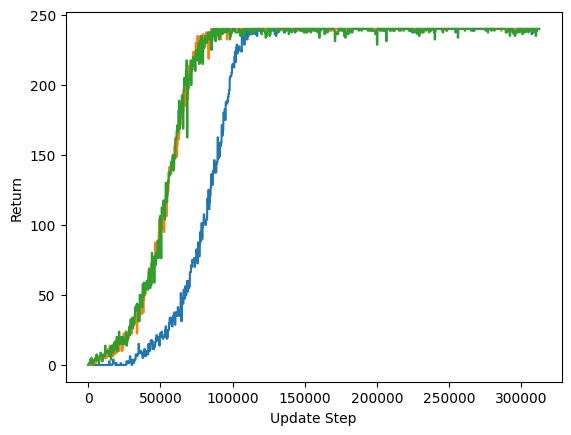

In [ ]:
%matplotlib inline

# set hyperparameters:
config = {
    "LR": 2.5e-4,
    "NUM_ENVS": 16,
    "NUM_STEPS": 128,
    "TOTAL_TIMESTEPS": 5e6,
    "UPDATE_EPOCHS": 4,
    "NUM_MINIBATCHES": 4,
    "GAMMA": 0.99,
    "GAE_LAMBDA": 0.95,
    "CLIP_EPS": 0.2,
    "ENT_COEF": 0.01,
    "VF_COEF": 0.5,
    "MAX_GRAD_NORM": 0.5,
    "ACTIVATION": "tanh",
    "ENV_NAME": "overcooked",
    "ENV_KWARGS": {
      "layout" : "cramped_room"
    },
    "ANNEAL_LR": True,
    "SEED": 0,
    "NUM_SEEDS": 3
}

config["ENV_KWARGS"]["layout"] = overcooked_layouts[config["ENV_KWARGS"]["layout"]]
rng = jax.random.PRNGKey(config["SEED"])
rngs = jax.random.split(rng, config["NUM_SEEDS"])
with jax.disable_jit(False):
    train_jit = jax.jit(jax.vmap(make_train(config)))
    out = train_jit(rngs)


for i in range(config["NUM_SEEDS"]):
    plt.plot(out["metrics"]["returned_episode_returns"][i].mean(-1).reshape(-1))
plt.xlabel("Update Step")
plt.ylabel("Return")
plt.show()